# A brief introduction to Python programming
## Overview
This notebook aims to explain frequently used functions and methods in this lecture as well as in the exercise. The following topics will be covered:
<br>
1. Commonly used built-in functions in the lecture  
    1.1. zip()  
    1.2 enumerate()  
    1.3 Lambda expressions  <br><br>
2. List comprehensions  
    2.1 General usage  
    2.2 List comprehensions vs. for-loops <br><br>
3. PyTorch library  
    3.1 Tensors  
    3.2 Common tensor operations used in the lecture  
      - Algebraic operations  
      - flatten()  
      - reshape()  
      - squeeze() and unsqueeze()  
      - zeros() vs. zeros_like()  
      - min() vs. argmin()  
      - Combining tensor operations <br><br>
      
TODO: pandas df -> tensor, zugriffe  
      plt -> line plot, scatter plot subplots, contour plots  
        
4. Object-orientated programming in python  
    4.1 General structure and initialization  
    4.2 Decorators 
    
For more in-depth information, feel free to check out the [references](#references) at the end of this notebook.

## 1. Commonly used built-in functions
When programming in python, there are a variety of build-in functions available. While some of these functions are intuitive to use, e.g. `abs()` for computing the absolute value of a number, others may be harder to understand. This section will discuss `zip()`, `enumerate()` and `lambda` expressions.

### 1.1 zip()
The `zip()` function iterates over given iterables, e.g. lists. For each item in the list it creates a tuple combining the items of all given input lists element-wise. `zip()` returns an object, so in order to access the elements of the list, the object either needs to be converted using the `list()` function or by de-referencing it using the `*` operator. It's important to note that in case of different lengths, `zip()` stops when reached the end of the shortest list. The `zip()` function is very useful when iterating over multiple lists within a loop.

In [29]:
# make two lists
a = [1, 2, 3]
b = ["a", "b", "c"]

# create a list with elements of both lists
zipped_list = zip(a, b)

# zip() returns an object, if we try to access the elements directly it will give us an error
print("1st element of the zipped lists: ", zipped_list[0])

TypeError: 'zip' object is not subscriptable

In [30]:
# in order to access the elements, either convert to list() or use the * operator such as *zipped_list
l = list(zipped_list)

# now we can access the list elements
print("1st element of the zipped lists: ", l[0])

1st element of the zipped lists:  (1, 'a')


In [31]:
# example if one list is shorter than the other
a = [1, 2, 3]
b = ["a", "b"]

# this time we use the *-operator for de-referencing
print("zipped list: ", *zip(a, b))

zipped list:  (1, 'a') (2, 'b')


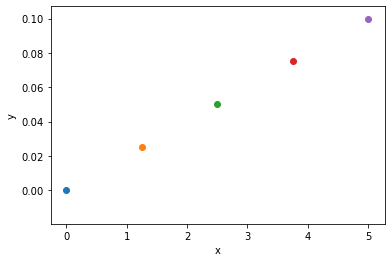

In [32]:
# example for using zip() in a for-loop
from numpy import linspace
import matplotlib.pyplot as plt

# create some data
x_data = linspace(0, 5, 5)
y_data = linspace(0, 0.1, 5)

for x, y in zip(x_data, y_data):
    plt.scatter(x, y)
    plt.xlabel("x")
    plt.ylabel("y")

### 1.2 enumerate()
While `zip()` combines the elements of multiple iterators to one list of tuples, `enumerate()` takes one iterator, e.g. a list, and returns a tuple. The tuple consists of the list element itself and a counter, starting at zero by default. Therefore, the counter variable represents the index of the element within the list.

In [21]:
x = [1, 2, 3, 4]
y = ["a", "b", "c"]

# counter starts at zero
for idx, item in enumerate(x):
    print(f"x[{idx}] = {item}")

x[0] = 1
x[1] = 2
x[2] = 3
x[3] = 4


In [22]:
# alternatively the start of counter can be set to a different number
for number, item in enumerate(y, start=5):
    print((number, item))

(5, 'a')
(6, 'b')
(7, 'c')


### 1.3 Lambda expressions
Lambda expressions are small functions, which are created by using the `lambda` keyword. In contrast to "normal" functions, lambda-functions are limited in their complexity and contain only a single line of code. This makes them perfect for small, simple tasks such as keyword arguments. The general syntax of creating a lambda expression is: <br>
    `lambda argument_1, argument_2, ..., argument_N: what_to_do`<br><br>
There are a variety of cases where lambda expressions come in handy, possible usages might be:
1. defining functions for repeatedly executed tasks in only one line, e.g. `function = lambda x: x+5`. The function can then be executed as usual by passing an argument, e.g. `function(10)`. The parameter can alternatively be passed directly into the lambda function, such as `(lambda x: x+5)(20)`, which would give the result `25`. In this case, the lambda expression as well as the parameters have to be set in parentheses.
2. a much more common use of lambda functions are keyword arguments. Here the lambda function can be used e.g. for sorting a list following a certain pattern.


In [24]:
# example for possible usages of the lambda expression: creating a function that adds 2 parameters
x, y = 3, 6

# use lambda function as normal function
fct = lambda a, b: a+b
print(f"using lambda as normal function: {x} + {y} = {fct(x, y)}")

# use parentheses to execute the lambda function directly
print(f"executing lambda directly: {x} + {y} = {(lambda a, b: a+b)(x, y)}")

# or apply lambda function for keyword arguments, e.g. for sorting list of strings containing file names of cases to import
list_with_str = ["case_5", "case_1", "case_10", "case_0"]

# sort without key creates a problem since the sort() function sorts character-wise and 1 < 5; which leads to a wrongly sorted list
sorted_list = sorted(list_with_str)
print("\nsorted list without key: ", sorted_list)

# to mitigate this issue, it's better to use lambda function as key for sorting a list of strings -> now it's sorted correctly
sorted_list_lambda = sorted(list_with_str, key=lambda case: float(case.split("_")[-1]))
print("sorted list with lambda function as key: ", sorted_list_lambda)

using lambda as normal function: 3 + 6 = 9
executing lambda directly: 3 + 6 = 9

sorted list without key:  ['case_0', 'case_1', 'case_10', 'case_5']
sorted list with lambda function as key:  ['case_0', 'case_1', 'case_5', 'case_10']


## 2. List comprehensions
### 2.1 General usage
List comprehensions are an efficient way of creating new lists without the need of using for-loops. Especially, if the task needs to be repeated multiple times, list comprehensions are clear and efficient while usually beeing faster than a for-loop. If the task gets more complicated however, e.g. involves multiple conditional statements, list comprehensions quickly become hard to read making it prone to errors (and also hard debug). The general syntax of list comprehensions is:<br>
`list = [what_to_do_for_each_element_of_the_list for some_variable in name_of_the_list if some_condition]`<br><br>
The conditional statements are optional, if there exist an `else` as well, then the conditional statement needs to be located at the beginning of the list comprehension:<br>
`list = [what_to_do_for_each_element_of_the_list if some_condition else do_sth_else for some_variable in name_of_the_list]`<br><br>

In [54]:
# 1st example
x = [1, 2, 3, 4, 5]

# using a for loop to add 1 to each element of the list
new_list = []
for element in x:
    new_list.append(element+1)
    
print(new_list)

# same operation using list comprehension
new_list = [element+1 for element in x]

print(new_list)

[2, 3, 4, 5, 6]
[2, 3, 4, 5, 6]


In [61]:
# 2nd example: using condition to filter out all non-zero elements of an array
import torch as pt

# generate some random numbers around zero
random_numbers = pt.randint(low=-3, high=3, size=(100, 1))
print("length of original list: ", len(random_numbers))

# using a for-loop to filter out zeros
non_zero_elements = []
for element in random_numbers:
    if element != 0:
        non_zero_elements.append(element.item())
        
print("length of filtered list using for-loop: ", len(non_zero_elements))

# same but using list comprehension
non_zero_elements = [element.item() for element in random_numbers if element != 0]
print("length of filtered list using list comprehension: ", len(non_zero_elements))

# list comprehension with an else statement. In this case we want to replace all zero elements with 1 instead of filtering them out:
non_zero_elements = [element.item() if element != 0 else 1 for element in random_numbers]
print("length of list using list after replacing all zeros: ", len(non_zero_elements))

length of original list:  100
length of filtered list using for-loop:  84
length of filtered list using list comprehension:  84
length of list using list after replacing all zeros:  100


### 2.2 List comprehensions vs. for-loops
In a lot of cases, list comprehensions are more efficient than using to for-loops, while at the same time making the code shorter and clearer. For more complex tasks however, list comprehensions quickly get unreadable. In the next step, we want to see how much faster a list comprehension actually is, compared to a for-loop. Therefore, we use the same function as before to filter out zeros of an array, firstly by using a loop and secondly by using list comprehension. The `timeit` module provides a useful function to get the mean execution time. In the following, both cases are executed 10000 times.

In [62]:
# using same example as before to filter out zeros
import torch as pt

def for_loop(numbers: pt.Tensor) -> list:
    non_zero_elements = []
    for element in random_numbers:
        # if the element is not zero -> append to a list
        if element != 0:
            non_zero_elements.append(float(element))
    return non_zero_elements

# generate array with 1000 random numbers between [-10, 10]
random_numbers = pt.randint(low=-10, high=10, size=(1000, 1))

Now use the `timeit` module to time the execution times:

In [2]:
# -n = number of executions
%timeit -n 10000 for_loop(random_numbers)

4.09 ms ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [3]:
%timeit -n 10000 [float(element) for element in random_numbers if element != 0]

3.56 ms ± 67.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


As can be seen by this little example, using list comprehension instead of for-loops is $\approx15\%$ faster than using a for-loop (for this specific example).

## 3. PyTorch
### 3.1 Tensors  <a id="tensors"></a>
The [Pytorch](https://pytorch.org/docs/stable/index.html) library provides efficient data structures for operating with large amounts of data, e.g. tensors as well as tools for deep learning and neural networks. Thes following section gives a brief overview on what tensors are and how to how to operate with them. [Tensors](https://pytorch.org/docs/stable/tensors.html) store elemtents of a certain type, e.g. floating point numbers in a multi-dimensional matrix. In general, tensors need to be initialized for example with zeros before operating with them, similar to [numpy arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html). The size of a tensor is defined when initailizing the tensor using the keyword argument `size`. TODO: docs verlinken

In [2]:
import torch as pt

# creating a 1x1 tensor filled with zeros, the size argument takes a tuple with (number of rows, number of columns)
t = pt.zeros(size=(1, 1))
print("1x1 tensor:\n", t)

# similarily, we can create an column vector [x, y, z]^T filled with zeros
t = pt.zeros(size=(3, 1))
print("\n3x1 column vector:\n", t)

# in the same way, we can also create a 3x3 matrix filled with ones
t = pt.ones(size=(3, 3))
print("\n3x3 matrix:\n", t)

1x1 tensor:
 tensor([[0.]])

3x1 column vector:
 tensor([[0.],
        [0.],
        [0.]])

3x3 matrix:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


Alternatively, other data types such as lists can be converted to tensors. It is important that the list elements have to be of the same data type.

In [21]:
# creating a list and converting it to a tensor
a = [1, 2, 3]
a_tensor = pt.tensor(a)
print("original list:\n", a)
print("\nconverted to tensor:\n", a_tensor)

# this also works for nested lists
b = [[1, 2], [3, 4]]
b_tensor = pt.tensor(b)
print("\noriginal list:\n", b)
print("\nconverted to tensor:\n", b_tensor)

original list:
 [1, 2, 3]

converted to tensor:
 tensor([1, 2, 3])

original list:
 [[1, 2], [3, 4]]

converted to tensor:
 tensor([[1, 2],
        [3, 4]])


When converting lists to tensors, there can occur some problems as shown in the following examples:

In [41]:
# all list elements have to be of the same data type, otherwise an error occurs:
a = [1, 2, "a"]
b = pt.tensor(a)

TypeError: new(): invalid data type 'str'

In [78]:
# also if nested lists are to be converted, the dimensions have to be consistent throughout the list
a = [[1, 2], [3, 4, 5]]

# this is not working, because 1st element is 2 long and 2nd element has a length of 3
b = pt.tensor(a)

ValueError: expected sequence of length 2 at dim 1 (got 3)

### accessing tensor elements
When initializing a tensor, the size of the tensor needs to be defined. The general syntax for the `size` argument is `size=(dim=0, dim=1, dim=2, ...)`, the first dimension `dim=0` refers to the number of rows and `dim=1` to the number of columns. The $3^{rd}$ dimension denotes the number of elements within each element of the (dim=0 * dim=1) sized matrix and so on. When operating with tensors, single elements can be accessed as well as complete columns, rows or matrices within the tensor, which will be illustrated by the following examples. A more comprehensive introduction can be found in the [Pytorch docs](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html) for tensors.

In [47]:
# create a 2x3 tensor filled with random numbers
random_tensor = pt.randn(size=(3, 3))

# this tensor has 3 rows and 3 columns
print("3x3 tensor with random numbers:\n", random_tensor)

3x3 tensor with random numbers:
 tensor([[-0.9653, -1.2316, -0.4817],
        [ 0.5675, -0.1082, -0.5523],
        [ 1.3883, -0.2398, -0.6280]])


In [79]:
# now let's access the 2nd element of the first row (indices start at zero)
print("2nd element of 1st row: ", random_tensor[0, 1])

# we can also access the last element of the 1st row by using [-1] as index:
print("last element of 1st row:", random_tensor[0, -1])

# complete rows or columns can be accessed by using [:]
print("\nall columns of 1st row:", random_tensor[0, :])
print("all rows of 2nd colunm:", random_tensor[:, 1])

# now lets get the a 2x2 submatrix of the tensoor containing the rows 1, 2 and columns 1, 2:
print("\n2x2 matrix of tensor:\n", random_tensor[:2, :2])

# similarily, we can get the elements of the last two rows and columns:
print("\n2x2 matrix of tensor:\n", random_tensor[1:, 1:])

2nd element of 1st row:  tensor(0.3186)
last element of 1st row: tensor(0.6096)

all columns of 1st row: tensor([0.1626, 0.3186, 0.3383, 0.6096])
all rows of 2nd colunm: tensor([0.3186, 0.1732, 0.1504, 0.1674])

2x2 matrix of tensor:
 tensor([[0.1626, 0.3186],
        [0.1272, 0.1732]])

2x2 matrix of tensor:
 tensor([[0.1732, 0.9283, 0.1613],
        [0.1504, 0.2836, 0.8600],
        [0.1674, 0.4228, 0.7884]])


In [60]:
# further, we can specify ranges which we want to access
random_tensor = pt.rand(size=(4, 4))
print("original tensor:\n", random_tensor)
      
# get columns 1-3 and rows 2-4
print("\nrows 1-3 & columns 2-4:\n", random_tensor[1:3, 2:4])

original tensor:
 tensor([[0.1626, 0.3186, 0.3383, 0.6096],
        [0.1272, 0.1732, 0.9283, 0.1613],
        [0.7222, 0.1504, 0.2836, 0.8600],
        [0.4421, 0.1674, 0.4228, 0.7884]])

rows 1-3 & columns 2-4:
 tensor([[0.9283, 0.1613],
        [0.2836, 0.8600]])


As can be seen in this example, when using the range `[1:3, 2:4]`, the stop indices `3, 4` are exluded resulting in a 2x2 tensor as output. In general, the size of a tensor can be determined by using the `size()` method:

In [61]:
# get the size of this tensor
print("size of the original tensor: ", random_tensor.size())
print("\nsize of the submatrix within the tensor: ", random_tensor[1:3, 2:4].size())

size of the original tensor:  torch.Size([4, 4])

size of the submatrix within the tensor:  torch.Size([2, 2])


### 3.2. Common tensor operations
### Algebraic operations
A great advantage of using tensors is the fact that algebraic operations, such as elements-wise addition, can easily be done using `+, -, *, /`:

In [76]:
# create two tensors
a = pt.tensor([1, 2, 3])
b = pt.tensor([1, 1, 1])

# now add them element-wise:
c = a + b
print(c)

# of course, this can be extended to higher dimensions:
x = pt.randint(low=0, high=5, size=(2, 3))
y = pt.randint(low=0, high=5, size=(2, 3))
print("\nx = ", x)
print("\ny = ", y)
print("\nx + y = ", x + y)

tensor([2, 3, 4])

x =  tensor([[0, 3, 3],
        [2, 3, 2]])

y =  tensor([[4, 3, 0],
        [1, 3, 1]])

x + y =  tensor([[4, 6, 3],
        [3, 6, 3]])


In [80]:
# a matrix-vector product can be computed using @
x = pt.randint(low=0, high=3, size=(2, 3))
y = pt.randint(low=0, high=3, size=(3, 1))
print("x = \n", x)
print("\ny = \n", y)

# compute the matrix-vector product of x and y
print("\nx * y = \n", x @ y)

x = 
 tensor([[0, 2, 1],
        [0, 0, 1]])

y = 
 tensor([[2],
        [0],
        [2]])

x * y = 
 tensor([[2],
        [2]])


### flatten() 
The `flatten()` method reshapes an arbitrary $n-$dimensional tensor to a one-dimensional tensor:

In [88]:
# create tensor
x = pt.rand(size=(2, 3))

# then flatten the tensor
y = x.flatten()

print("original tensor:\n", x)
print("\nflattened tensor:\n", y)
print("\nsize of original tensor:", x.size())
print("size of flattened tensor:", y.size())

original tensor:
 tensor([[0.6856, 0.5376, 0.8368],
        [0.3005, 0.0751, 0.9667]])

flattened tensor:
 tensor([0.6856, 0.5376, 0.8368, 0.3005, 0.0751, 0.9667])

size of original tensor: torch.Size([2, 3])
size of flattened tensor: torch.Size([6])


### reshape()
In contrast to `flatten()`, `reshape()` can be used to reshape a tensor to specific dimensions instead of reshaping it to a one-dimensional tensor. An important requirement for using the `reshape()` method is that the output tensor has the same number of elements as the input tensor.

In [3]:
# create tensor with 6 rows and 2 columns
x = pt.rand(size=(6, 2))
print("original tensor:\n", x)

# reshape it to a row-vector
y = pt.reshape(x, shape=(1, 12))
print("\nreshaped tensor:\n", y)

# alternatively, reshape it to a matrix with 3 rows and 4 columns
z = pt.reshape(x, shape=(3, 4))
print("\nreshaped tensor:\n", z)

original tensor:
 tensor([[0.0510, 0.3916],
        [0.9759, 0.0697],
        [0.4798, 0.7123],
        [0.2831, 0.3457],
        [0.6900, 0.9297],
        [0.9801, 0.6811]])

reshaped tensor:
 tensor([[0.0510, 0.3916, 0.9759, 0.0697, 0.4798, 0.7123, 0.2831, 0.3457, 0.6900,
         0.9297, 0.9801, 0.6811]])

reshaped tensor:
 tensor([[0.0510, 0.3916, 0.9759, 0.0697],
        [0.4798, 0.7123, 0.2831, 0.3457],
        [0.6900, 0.9297, 0.9801, 0.6811]])


When using `reshape()` the dimensions have to match, meaning the number of elements need to be the same. The following will not work:

In [4]:
# create tensor
x = pt.rand(size=(6, 2))

# this will not work since x has 6*2=12 elements and y would only have 3*3=9 elements
y = pt.reshape(x, shape=(3, 3))

RuntimeError: shape '[3, 3]' is invalid for input of size 12

### squeeze() and unsqueeze()
The `squeeze()` method removes dimensions with the size of $1$ from a tensor. If we have for example a $3x2x1-$ dimensional tensor, using the `squeeze()` method would lead to a tensor with the dimensions of $3x2$ by removing the $3^{rd}$ dimension (since the $3^{rd}$ dimension is $1$). If there exist multiple dimensions with the size of $1$, using `squeeze()` removes all of them. A specific dimension which shall be removed can be specified by the keyword argment `dim`, in case this is unwanted. The `squeeze()` method is frequently used, e.g. when passing features into a neural network, as shown in [lecture 3](https://github.com/AndreWeiner/ml-cfd-lecture/blob/main/notebooks/ml_intro.ipynb). Consequently, the `unsqueeze()` method inserts a dimension of the size $1$ at a specified dimension of the input tensor. TODO: broadcasting!

In [90]:
# create tensor
x = pt.rand(size=(3, 1))

# then squeeze the tensor
y = x.squeeze()

# unsqueeze the tensor in "row"-dimension
z = y.unsqueeze(dim=0)

# unsqueeze the tensor in "column"-dimension
z_2 = y.unsqueeze(dim=1)

print("original tensor:\n", x)
print("\nsqueezed tensor:\n", y)
print("\nunsqueezed tensor (dim=0):\n", z)
print("\nunsqueezed tensor (dim=1):\n", z_2)

print("\nsize of original tensor:", x.size())
print("size of squeezed tensor:", y.size())
print("size of unsqueezed tensor (dim=0):", z.size())
print("size of unsqueezed tensor (dim=0):", z_2.size())

original tensor:
 tensor([[0.9195],
        [0.0074],
        [0.3794]])

squeezed tensor:
 tensor([0.9195, 0.0074, 0.3794])

unsqueezed tensor (dim=0):
 tensor([[0.9195, 0.0074, 0.3794]])

unsqueezed tensor (dim=1):
 tensor([[0.9195],
        [0.0074],
        [0.3794]])

size of original tensor: torch.Size([3, 1])
size of squeezed tensor: torch.Size([3])
size of unsqueezed tensor (dim=0): torch.Size([1, 3])
size of unsqueezed tensor (dim=0): torch.Size([3, 1])


In [7]:
# by using the keyword argument 'dim', the dimension to be removed can be specified in case there exist multiple dimensions with the size of 1
x = pt.rand(size=(1, 3, 1, 2))

# remove all dimesions with the size of 1
y = x.squeeze()

# only remove the last dimension
z = x.squeeze(dim=2)

print("original tensor:\n", x)
print("\nsqueezed tensor:\n", y)
print("\nsqueezed tensor for 3rd dim:\n", z)

print("\nsize of original tensor:", x.size())
print("size of squeezed tensor:", y.size())
print("size of squeezed tensor for 3rd dim:", z.size())

original tensor:
 tensor([[[[0.0249, 0.6773]],

         [[0.7910, 0.5663]],

         [[0.2787, 0.2979]]]])

squeezed tensor:
 tensor([[0.0249, 0.6773],
        [0.7910, 0.5663],
        [0.2787, 0.2979]])

squeezed tensor for 3rd dim:
 tensor([[[0.0249, 0.6773],
         [0.7910, 0.5663],
         [0.2787, 0.2979]]])

size of original tensor: torch.Size([1, 3, 1, 2])
size of squeezed tensor: torch.Size([3, 2])
size of squeezed tensor for 3rd dim: torch.Size([1, 3, 2])


### zeros() vs. zeros_like()
In the previous examples, tensors were always initialized with zeros using the `zeros()` method. The `zeros_like()` method, however, is an efficient way to generate a tensor filled with zeros by using another tensor. For example, consider having a tensor $x$ filled with some values and we want to create a tensor $y$, which has the same size of $x$ but filled with zeros. Instead of using `y = pt.zeros(size=x.size())` we can create $y$ as <br> `y = pt.zeros_like(x)`.

In [12]:
# creating a tensor filled with zeros
x = pt.zeros(size=(2, 2))

# create tensor filled with some random numbers
y = pt.rand(size=(2, 2))

# use zeros_like() to create tensor of the same shape as y, but filled with zeros
z = pt.zeros_like(y)

print("tensor initialized with zeros:\n", x)
print("\ntensor initialized with random numbers:\n", y)
print("\nusing zeros_like() method:\n", z)

tensor initialized with zeros:
 tensor([[0., 0.],
        [0., 0.]])

tensor initialized with random numbers:
 tensor([[0.5156, 0.3358],
        [0.3833, 0.7853]])

using zeros_like() method:
 tensor([[0., 0.],
        [0., 0.]])


### min() vs. argmin() 
The `min()` method in torch returns the minimum of a $n-$dimensional tensor. In a lot of cases, additionally the position of the minimum element is required. To get the index of the minimum element, we can use the `argmin()` method of torch. The maximum element and it's position can analogously be determined by using `max()` and `argmax()` respectively.

In [19]:
# creating tensor filled with random numbers
x = pt.rand(size=(1, 5))

print("x = ", x)
print(f"min(x) = {'{:.4f}'.format(pt.min(x).item())} at position {pt.argmin(x).item()}")

x =  tensor([[0.7917, 0.9942, 0.4726, 0.0970, 0.4695]])
min(x) = 0.0970 at position 3


### Combining tensor operations
We only looked at single tensor operations so far. When programming in python, however, we can combine these methods in order shorten the code while at the same time making it more efficient. The following example illustrates a possible implementation for calculating the $L_2-$norm of a vector:

In [42]:
# let's define two vectors
x = pt.rand(size=(3, 1))
y = pt.rand(size=(3, 1))

# now we want to calculate the L2-norm between the vector elements without combining methods
l2 = x-y
l2 = l2.square()
l2 = l2.mean()
print("L2(x, y) = ", l2.item())

# a more clear and efficient way:
print("L2(x, y) = ", (x-y).square().mean().item())

L2(x, y) =  0.23877061903476715
L2(x, y) =  0.23877061903476715


In [51]:
# let's compare these two implementations wrt efficiency
def compute_sequential(x, y):
    l2 = x-y
    l2 = l2.square()
    l2 = l2.mean()
    return l2.item()

def combine_methods(x, y):
    return (x-y).square().mean().item()

# define some larger tensors filled with random numbers
x = pt.rand(size=(100, 100))
y = pt.rand(size=(100, 100))

In [56]:
# now time the execution
%timeit -n 10000 -r 5 compute_sequential(x, y)

21 µs ± 167 ns per loop (mean ± std. dev. of 5 runs, 10,000 loops each)


In [60]:
%timeit -n 10000 -r 5 combine_methods(x, y)

12.9 µs ± 205 ns per loop (mean ± std. dev. of 5 runs, 10,000 loops each)


It can be seen, that combining tensor operations is not only clearer and shorter, it makes the code run more efficiently as well. The improvement for this example was is about $\approx 63 \%$

## 4. Object-orientated programming in python  
As many other programming languages, phython supports object-orientated programming. The following section gives a brief overview of object-orientated programming in python.
 TODO: vererbung
### 4.1 General structure and initialization  
In python classes are defined with the keyword `class`. The class itself needs to have an `.__init__()` method in order to initialize attributes and methods.

In [62]:
# let's define a simple class
class SimpleClass():
    # currently the __init__() method is empty, so the class won't do anything
    def __init__(self):
        pass
    
# the class can now be instantiated
new_class = SimpleClass()

# and we can add some attributes
new_class.new_attribute = 42

print("new attribute of out class:", new_class.new_attribute)

new attribute of out class: 42


The keyword `self` represents the instance of the class and is required for accessing any attributes or methods of the class.

In [10]:
# we can initialize a class directly with attributes and methods as well:
class AddNumbers():
    def __init__(self, x = 1, y = 2):
        self.x = x
        self.y = y
    
    # method for adding two numbers
    def add_two_numbers(self):
        return self.x + self.y
    
# since values for x and y are given by default we can instanciate the class without parameters
add = AddNumbers()
print(f"x, y = {add.x}, {add.y}")
print(f"{add.x} + {add.y} = {add.add_two_numbers()}")

# alternatively, we can assign values for x and y when creating the instance
add_2 = AddNumbers(5, 37)
print(f"{add_2.x} + {add_2.y} = {add_2.add_two_numbers()}")

x, y = 1, 2
1 + 2 = 3
5 + 37 = 42


### 4.2 Decorators
Functions are represented as objects in python and can therefore be passed into other functions as arguments or returned by functions. Decorators use this property, by taking function object as arguments and then modifiying its behavior. The following examples where adopted from [Python Decorators in 15 Minutes](https://www.youtube.com/watch?v=r7Dtus7N4pI).

In [1]:
# let's define a function whhich only prints its name
def function1():
    print("function 1")
    
# now we define a function taking another function as argument and then calling this function    
def function2(f):
    f()
    
# now we can execute function1...
function1()

# ... or we can pass function1 into function2 and execute it within function2:
function2(function1)

function 1
function 1


In [3]:
# we can extend this example by adding another function into our function2
def function3(f):
    # let's use this function to execute whatever function is passed into function3
    def some_wrapper_function():
        print("starting function")
        f()
        print("function ended")

    return some_wrapper_function

# calling the wrapper function
print("calling function3 with function1 as argument:\n", function3(function1))

calling function3 with function1 as argument:
 <function function3.<locals>.some_wrapper_function at 0x7f5d443ce9d0>
---
starting function
function 1
function ended


As shown in this example, $function1$ is not executed within the $some\_wrapper\_function$. This is because $function3$ returns $some\_wrapper\_function$ as an object. In order to execute this object, we need to add parenthesis:

In [4]:
# function3 returns an object, still need to execute the function
function3(function1)()

starting function
function 1
function ended


Now we get the expected output. Using this notation, however, can get quite confusing, especially if more complex functions are involved. To avoid this we can assign the returned functioon object to another variable:

In [5]:
# we can assign the function call to another object, e.g. x and then call x()
x = function3(function1)

# now the variable x represents the function3 object called with function1 as argument and we can just execute it
x()

starting function
function 1
function ended


Instead of assigning the function object to a variable and then execute this object, python provides a short hand notation called decorators:

In [8]:
# a decorator is a short notation of executing the fnction object
@function3       # this is equivalent to: x = function3(x)
def x():
    print("executing function x using a decorator")
    
# since x is an object, we need to add parenthesis to execute it
x()

starting function
executing function x using a decorator
function ended


# References <a id="references"></a>
#### python documentation:
- [python docs](https://docs.python.org/3.3/library/functions.html) for built-in functions
- [python docs](https://docs.python.org/3/tutorial/controlflow.html) for flow control statements
- [python docs](https://docs.python.org/3/tutorial/datastructures.html#looping-techniques) for lists
- [python docs](https://docs.python.org/3/tutorial/classes.html) for classes (especially section 9.3, 9.5)
- [python docs](https://docs.python.org/3/glossary.html#term-decorator) for decorators
- [python docs](https://docs.python.org/3.3/library/functions.html#property) for the @property decorator
- [flowtorch](https://flowmodelingcontrol.github.io/flowtorch-docs/1.1/index.html) library
- [Pytorch docs](https://pytorch.org/docs/stable/index.html) (general)
- [Pytorch docs](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html) for tensors

#### other references:
- [lambda expressions](https://realpython.com/python-lambda/)
- [decorators](https://realpython.com/primer-on-python-decorators/)
- [Python Decorators in 15 Minutes](https://www.youtube.com/watch?v=r7Dtus7N4pI) (youtube)